In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1765,2020-09-26,United Kingdom,420726.0,423236.0,41961.0,41936.0,-2510.0,25.0
1766,2020-09-26,Germany,282054.0,282730.0,9463.0,9452.0,-676.0,11.0
1767,2020-09-26,Iran,439114.0,439882.0,25230.0,25222.0,-768.0,8.0
1768,2020-09-26,Turkey,311130.0,311455.0,7843.0,7858.0,-325.0,-15.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  11027.061016949152
RMSE =  40057.46341986595


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  315.8762711864407
RMSE =  790.1338344047713


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  80827.97005988024
RMSE =  126631.29813728567
-- World performances for deaths --
MAE =  1878.9041916167664
RMSE =  2279.1415641554777


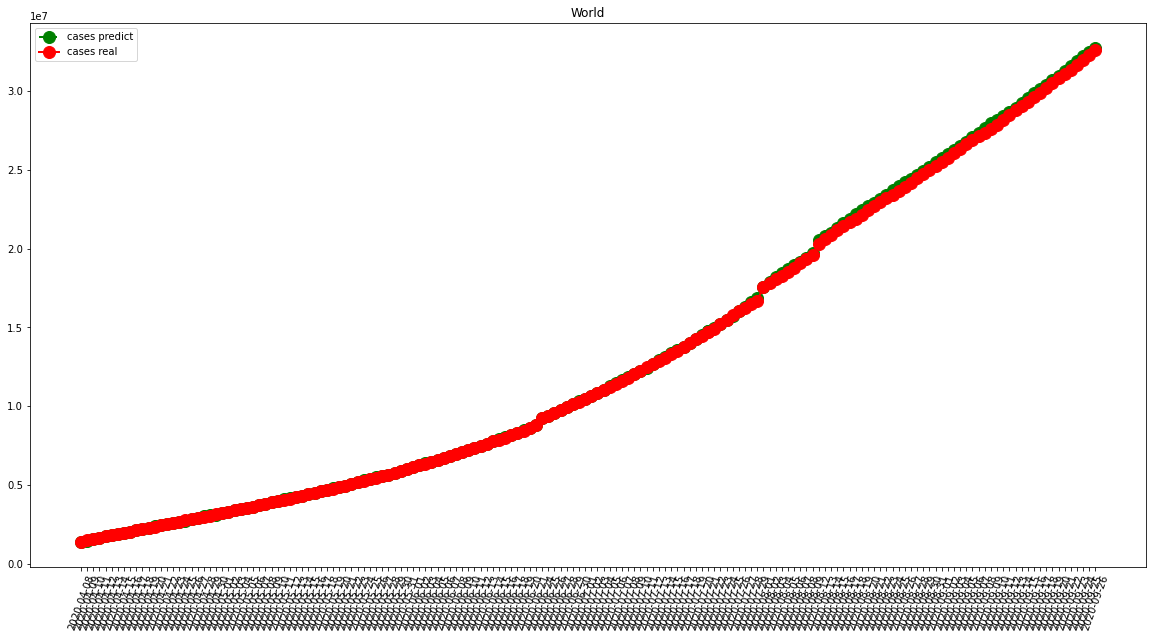

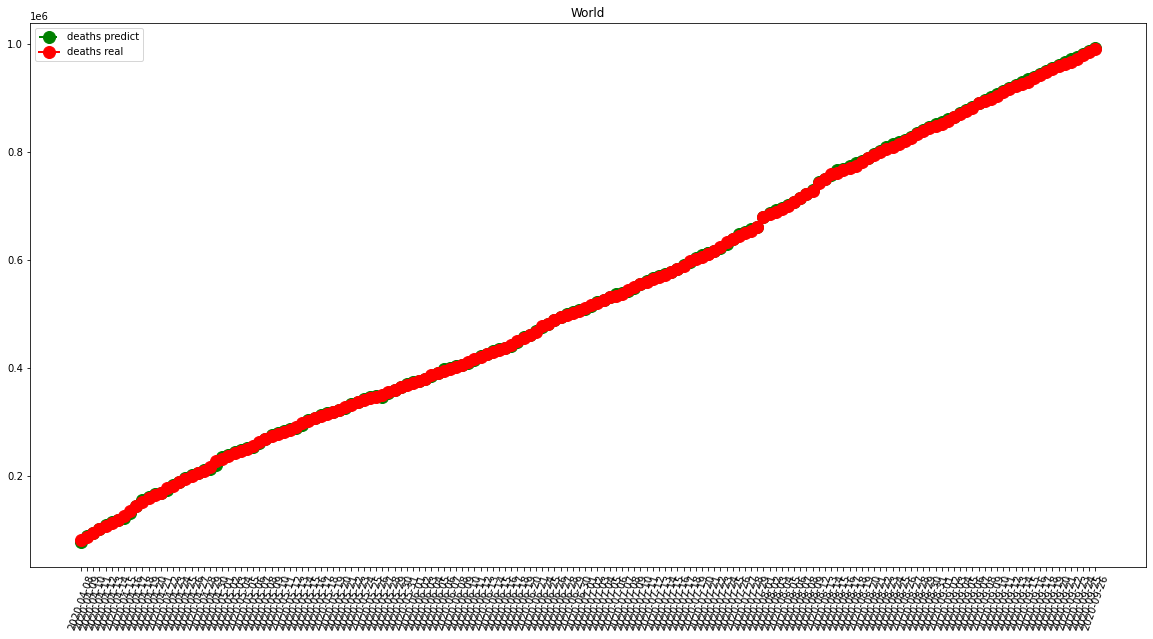

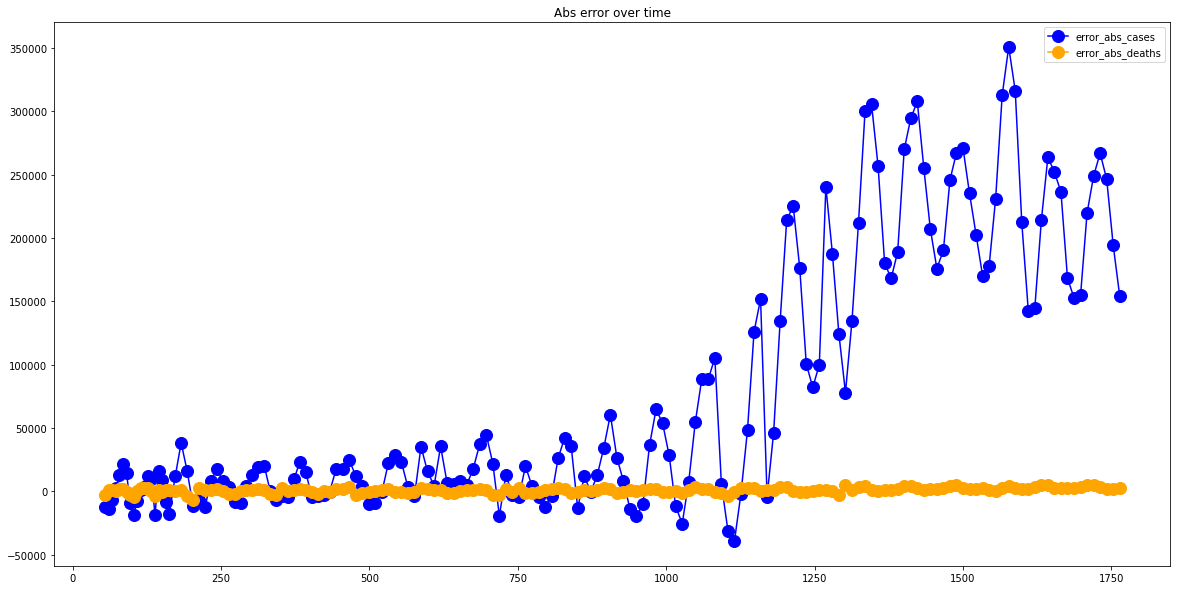

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1275.5254237288136
RMSE =  1963.4923285548598
-- France performances for deaths --
MAE =  109.98870056497175
RMSE =  252.71569072573047


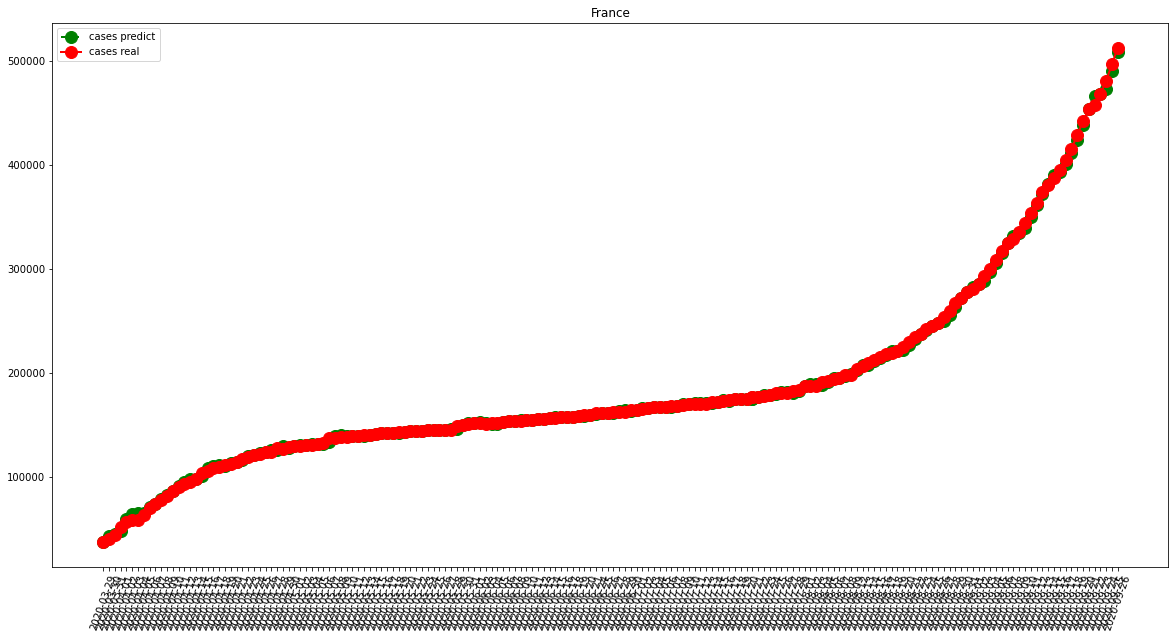

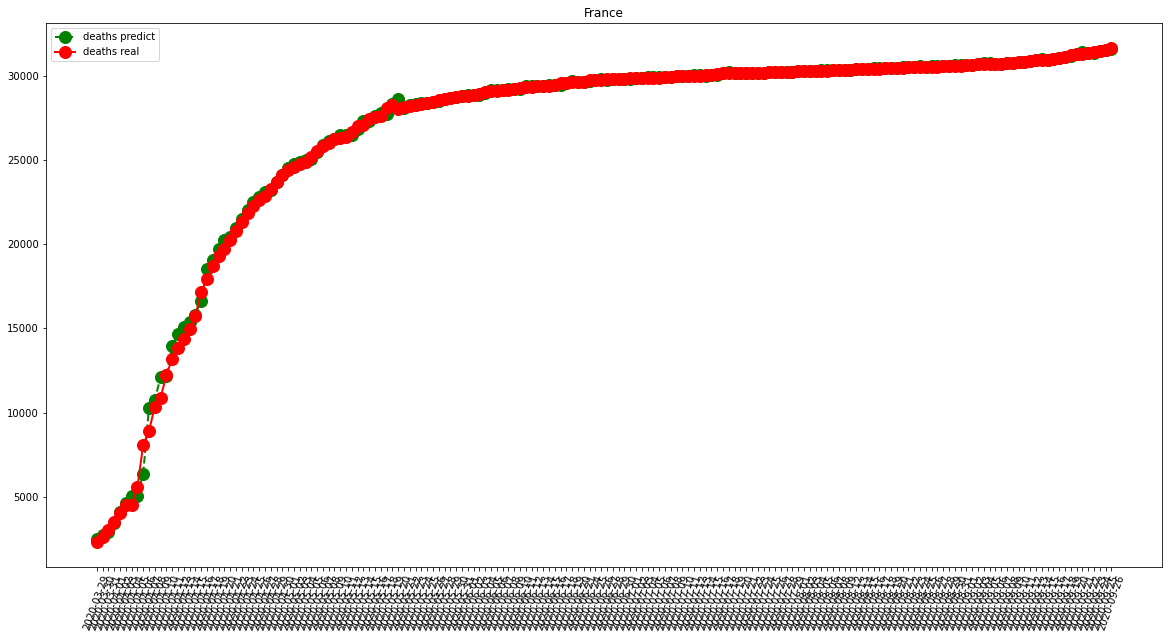

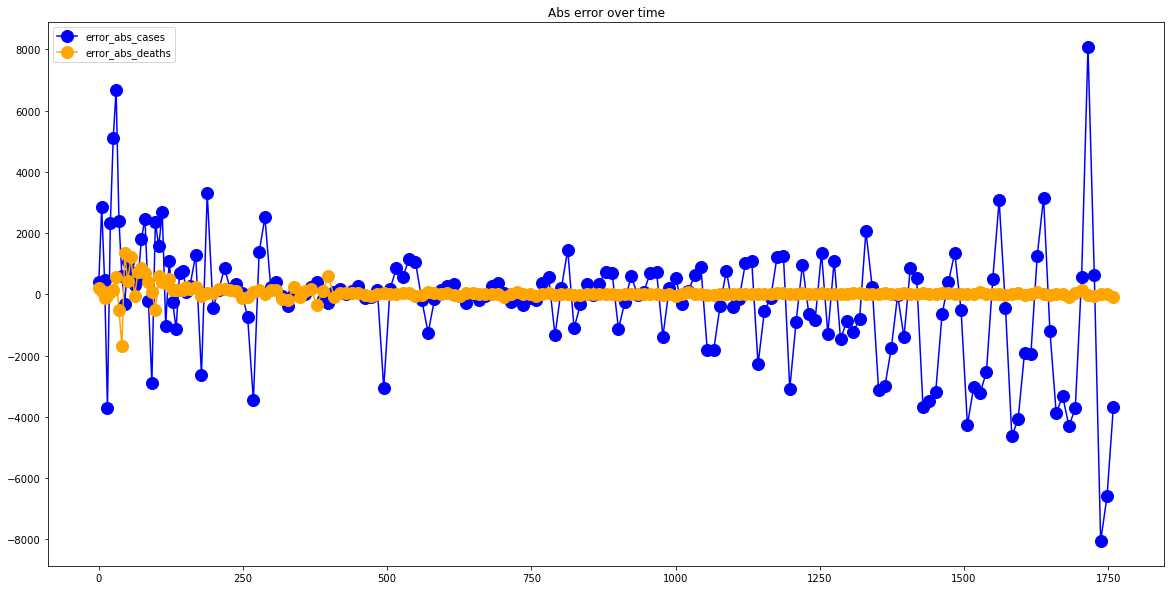

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  305.31073446327684
RMSE =  445.43351574522603
-- Italy performances for deaths --
MAE =  65.2090395480226
RMSE =  223.2138140430852


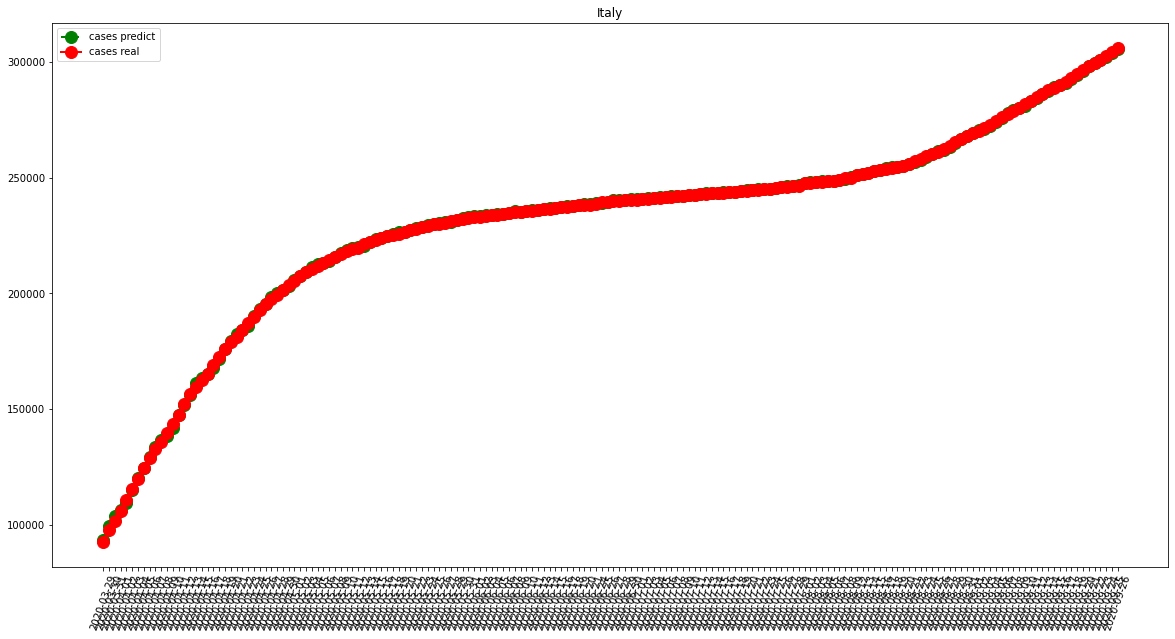

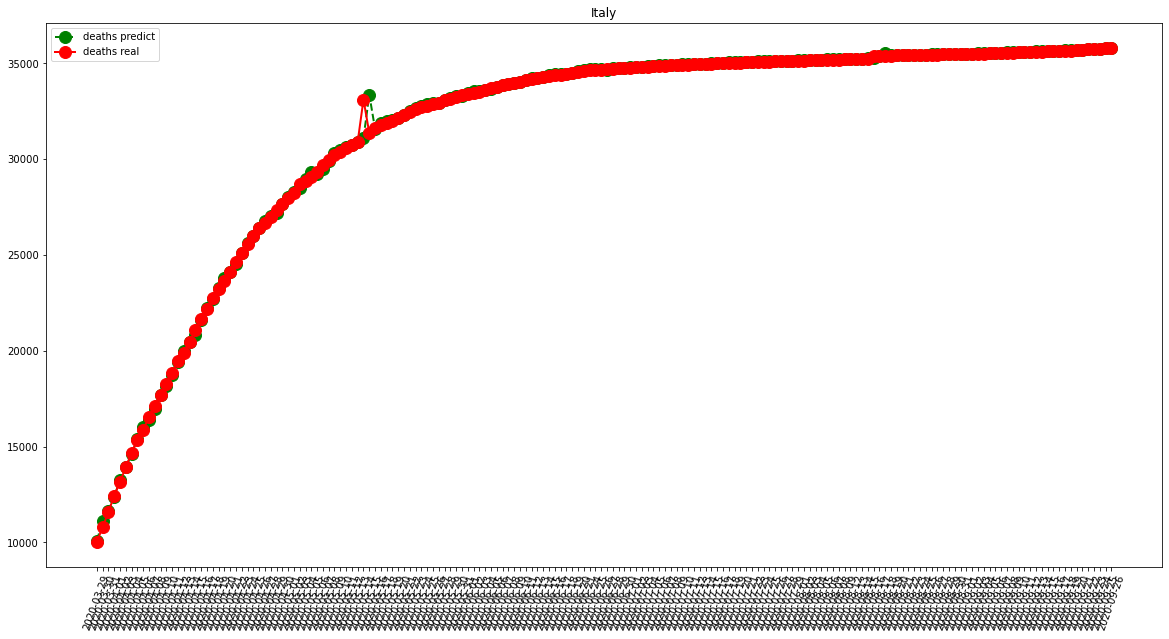

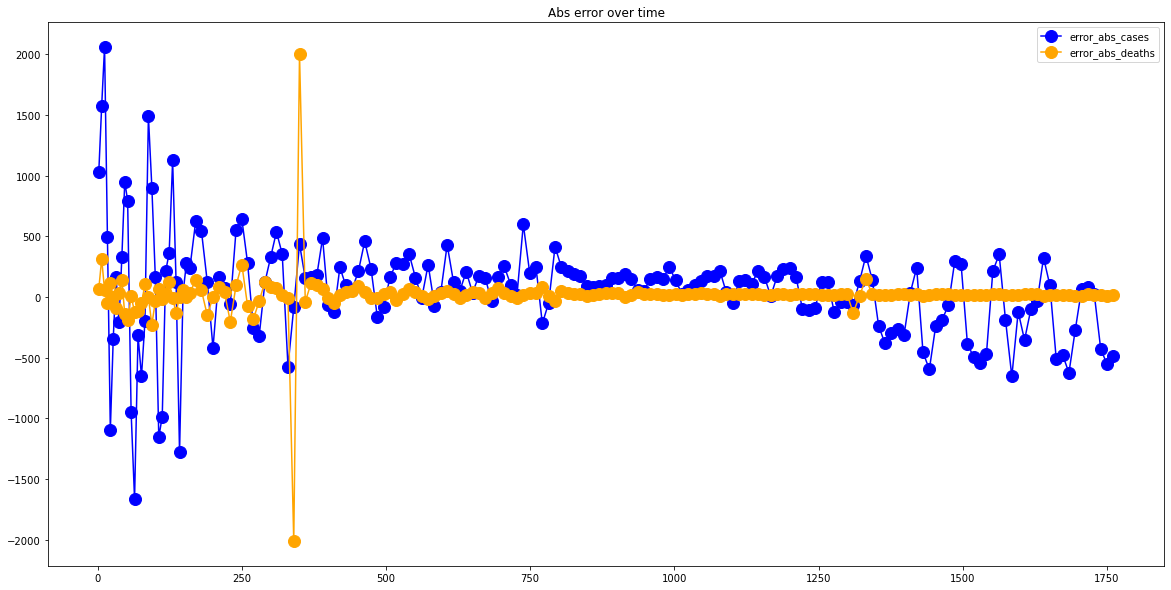

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2690.9322033898306
RMSE =  5268.746463228736
-- Spain performances for deaths --
MAE =  119.68361581920904
RMSE =  307.63798520908114


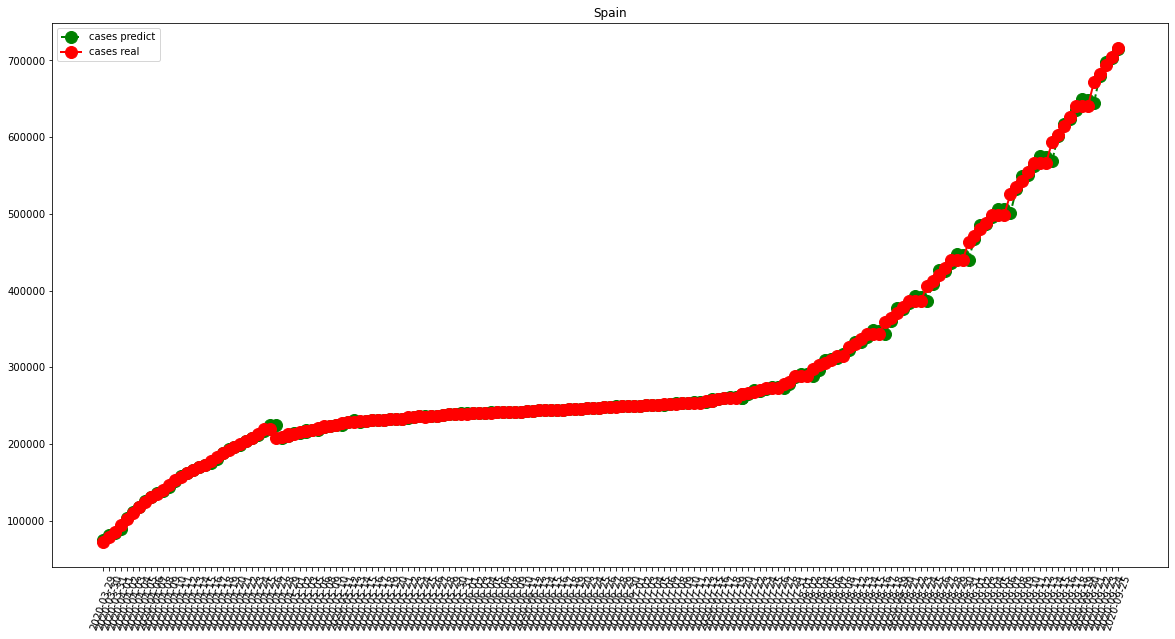

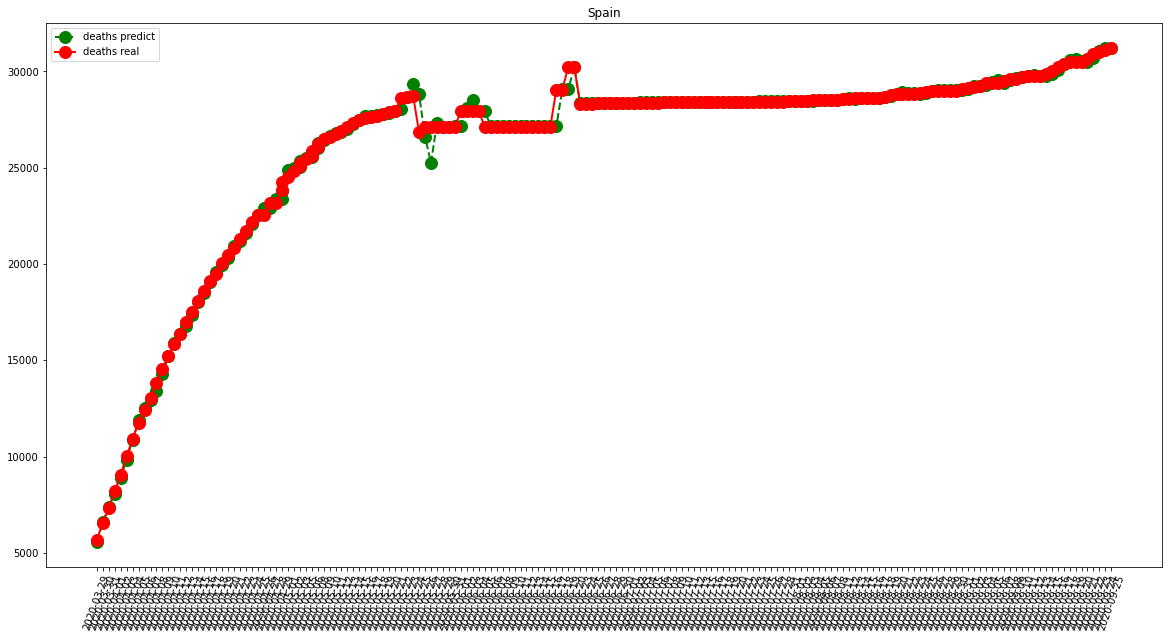

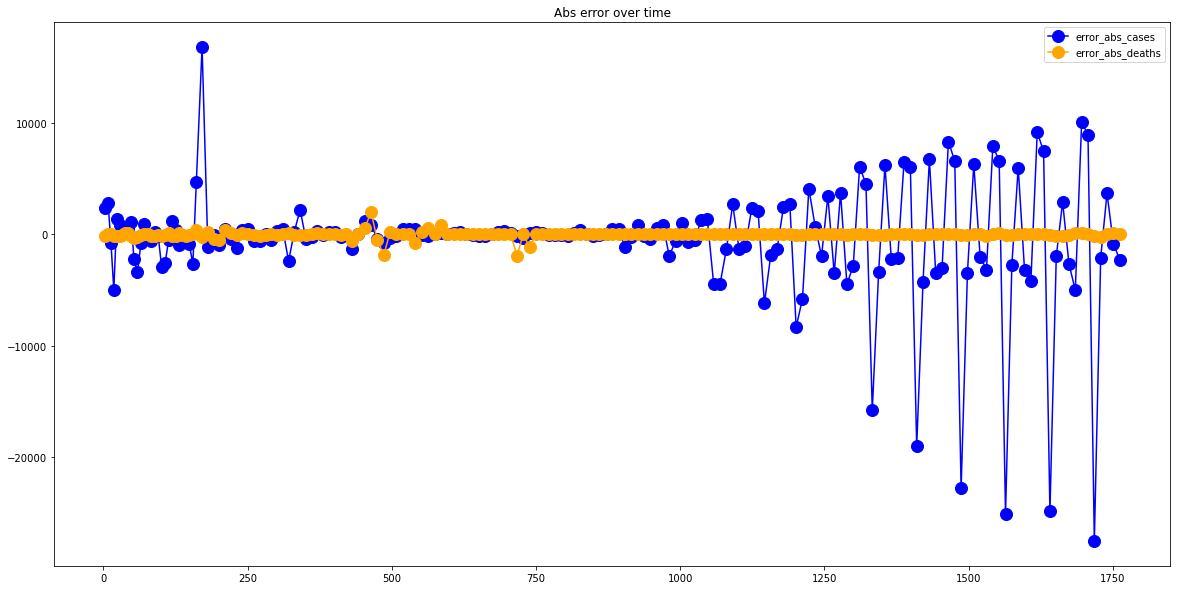

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  15930.310734463277
RMSE =  23296.70627564732
-- United States performances for deaths --
MAE =  477.6666666666667
RMSE =  668.3641510569512


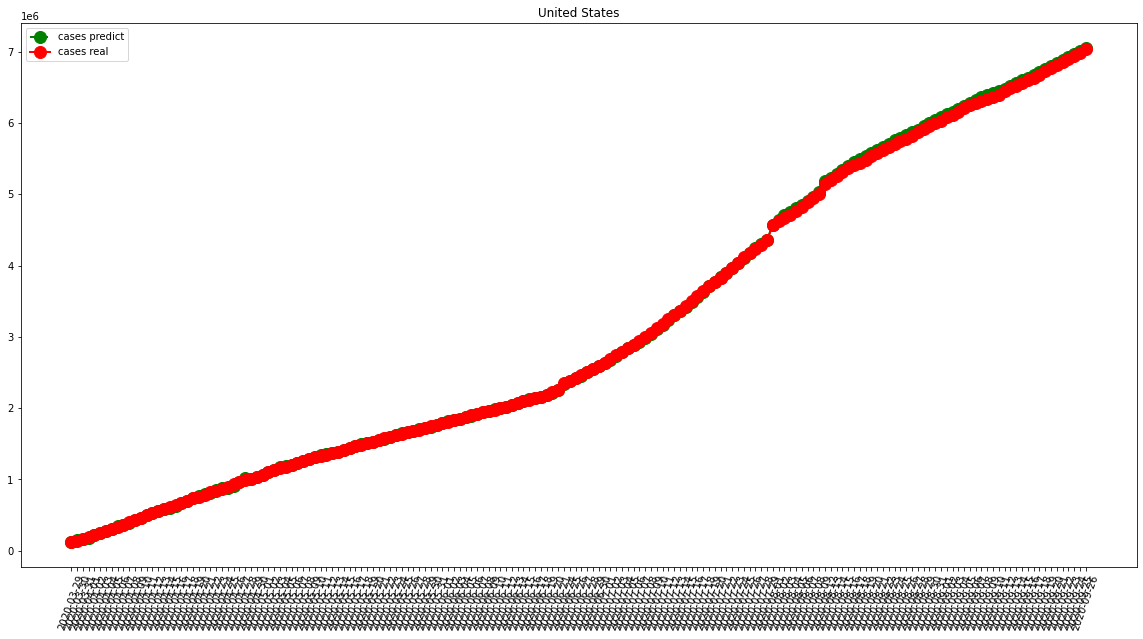

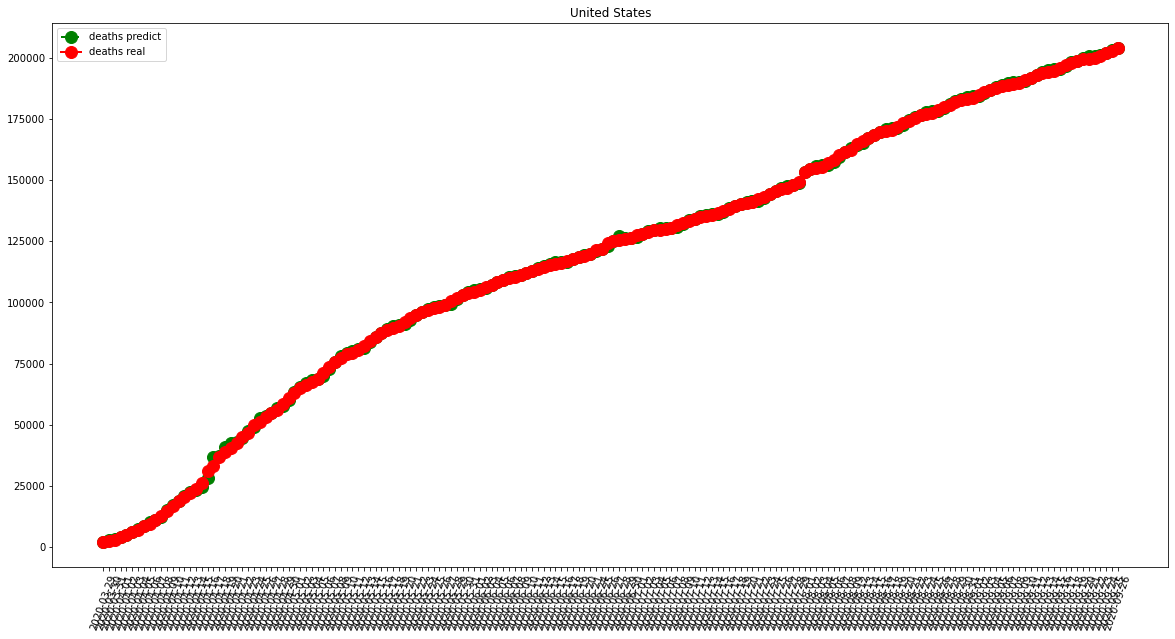

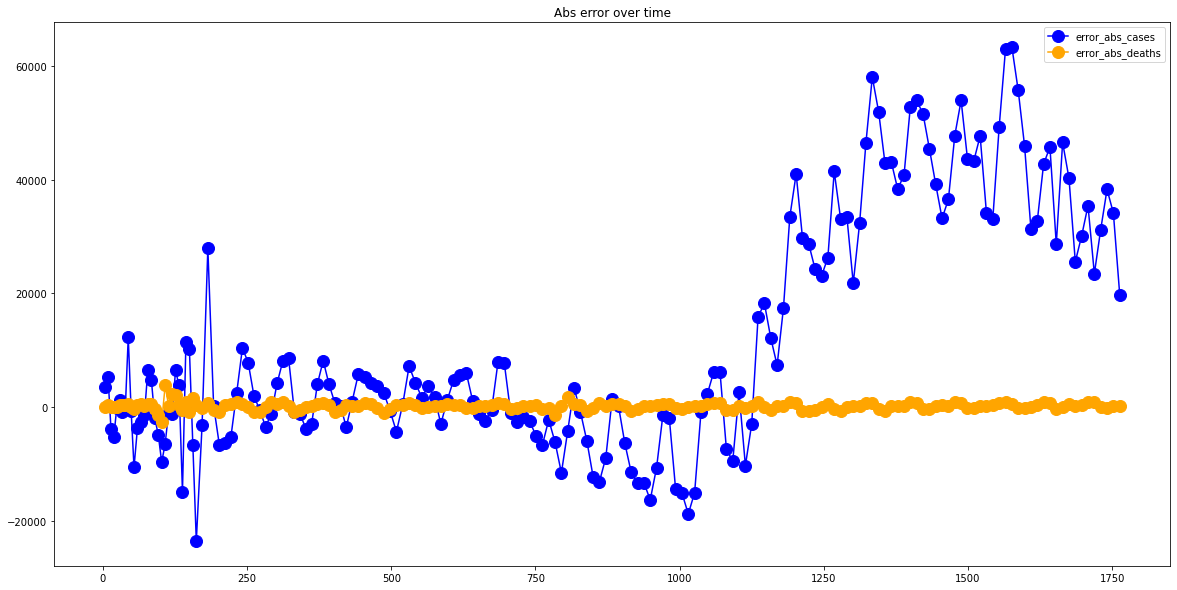

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  57.7909604519774
RMSE =  89.77734542417942
-- China performances for deaths --
MAE =  24.231638418079097
RMSE =  118.040857620557


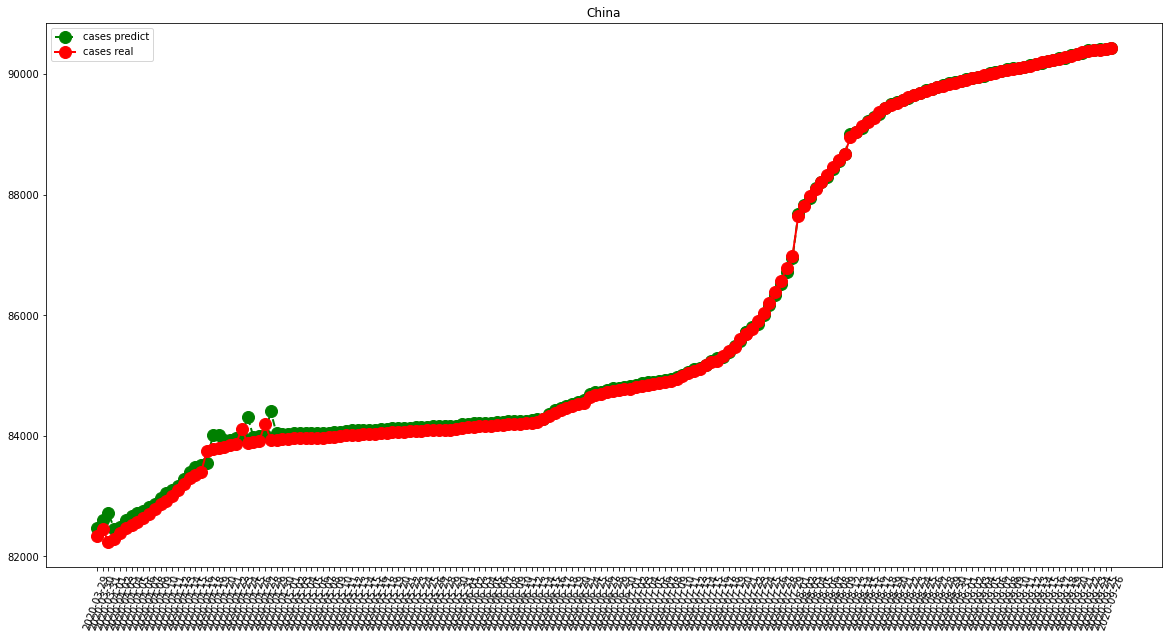

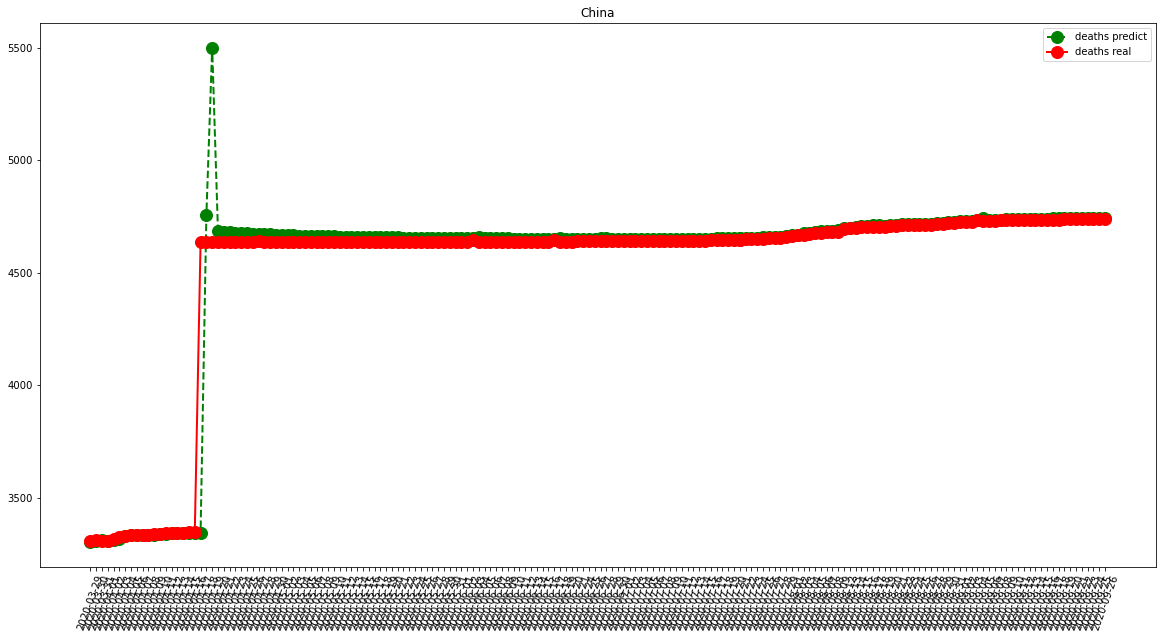

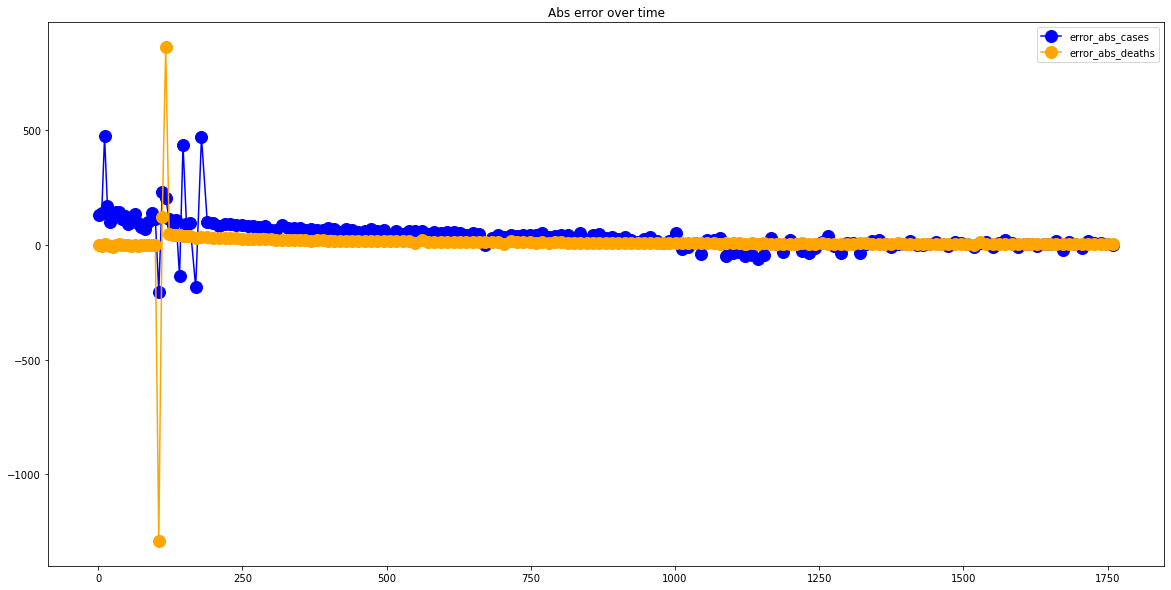

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1064.8993288590605
RMSE =  3472.9519385942035
-- United Kingdom performances for deaths --
MAE =  207.53020134228188
RMSE =  699.2475342065638


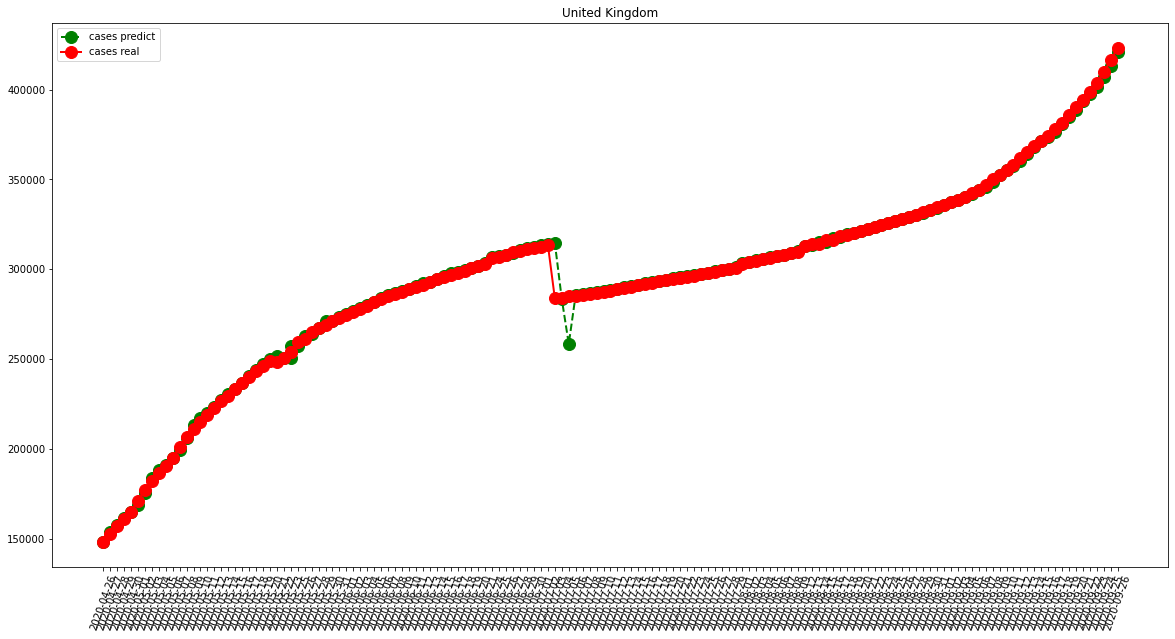

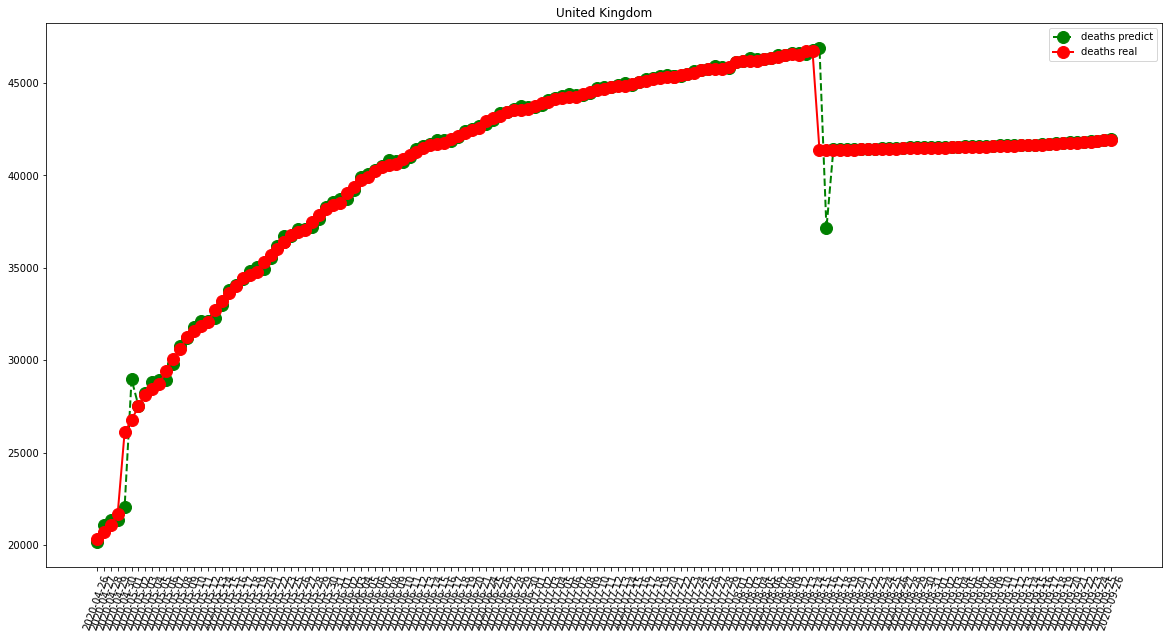

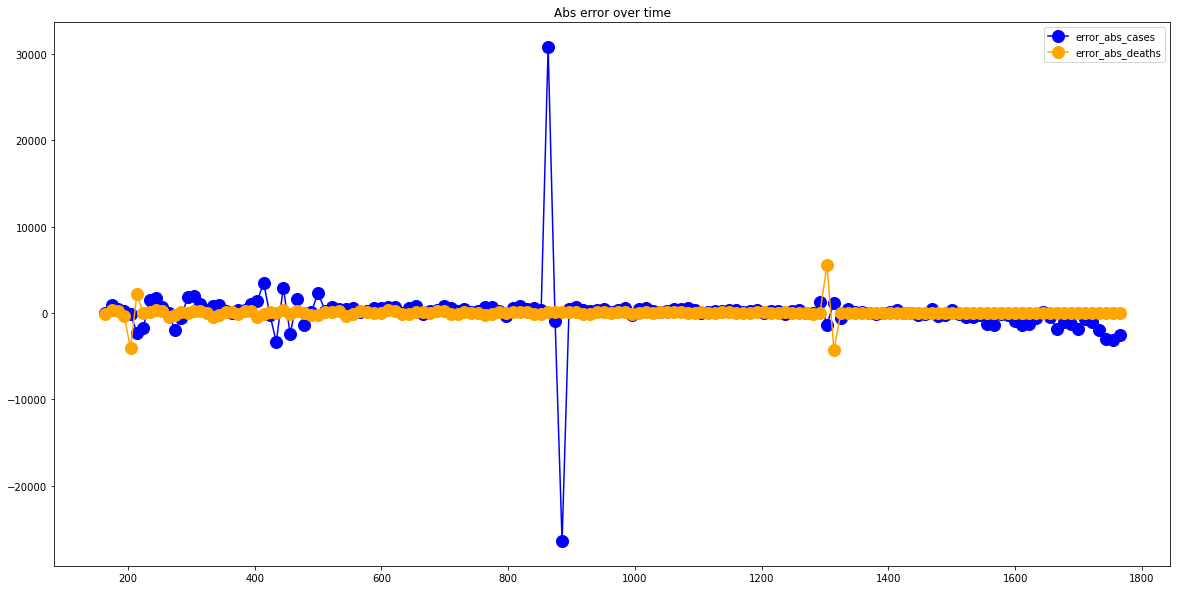

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  424.93959731543623
RMSE =  589.499161784787
-- Germany performances for deaths --
MAE =  18.523489932885905
RMSE =  36.12933515940202


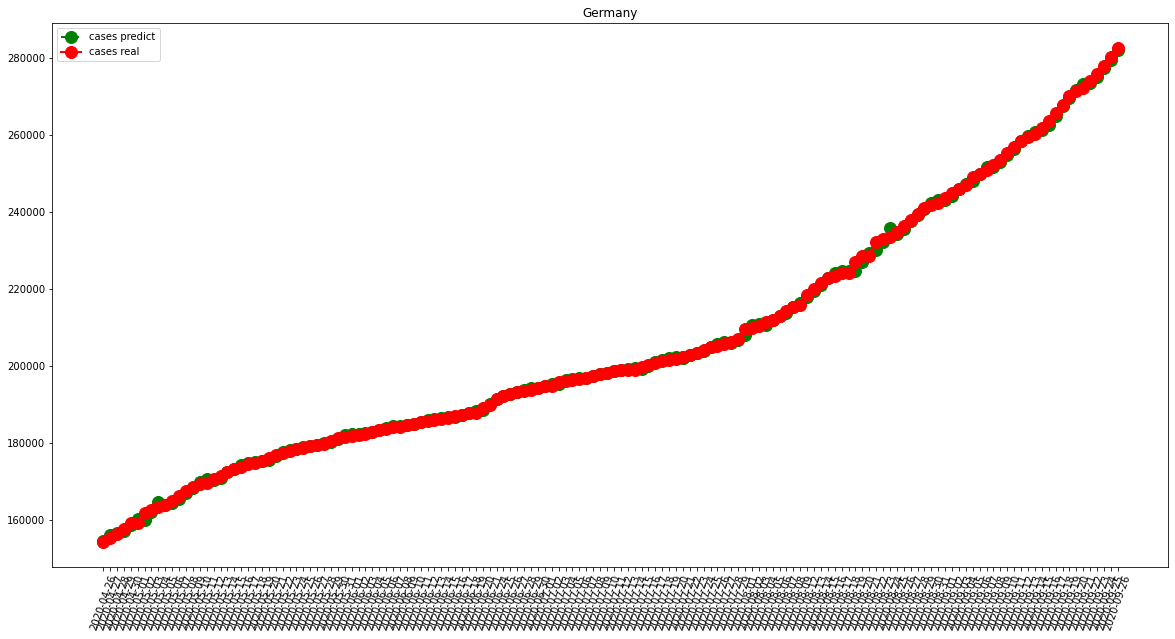

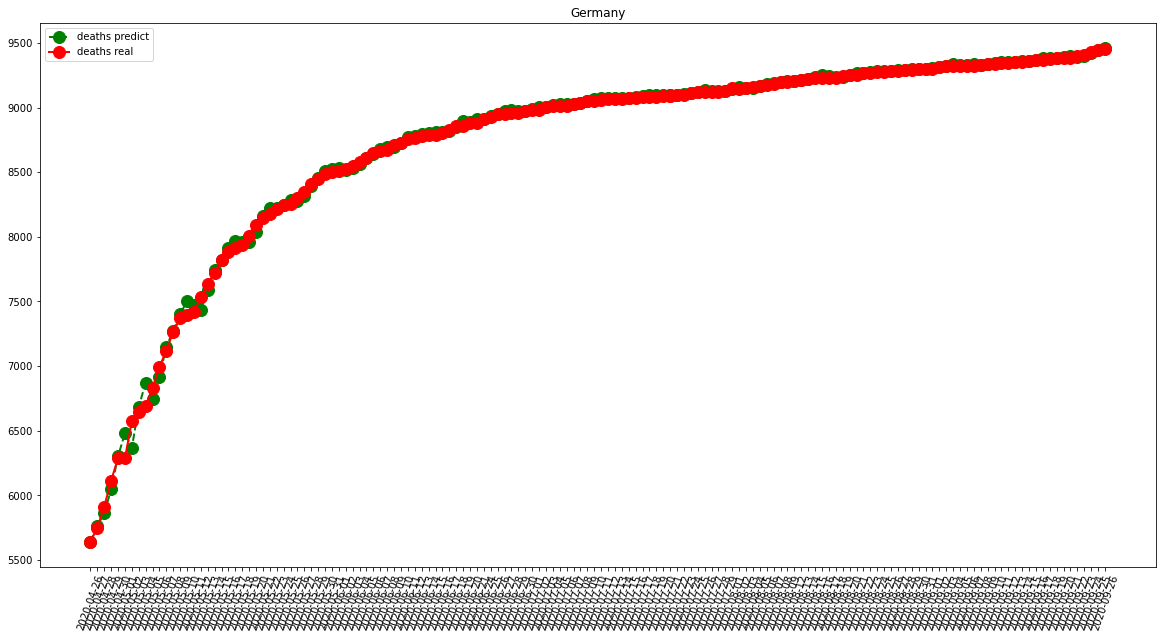

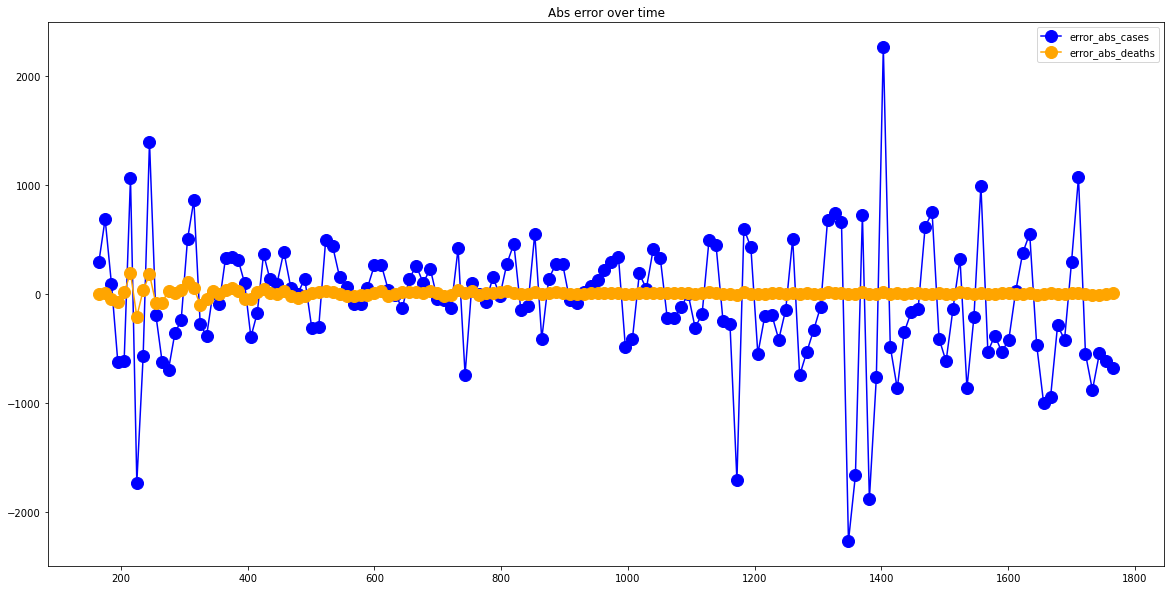

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  866.8389261744967
RMSE =  1216.3465292401795
-- Iran performances for deaths --
MAE =  51.033557046979865
RMSE =  84.0978975708604


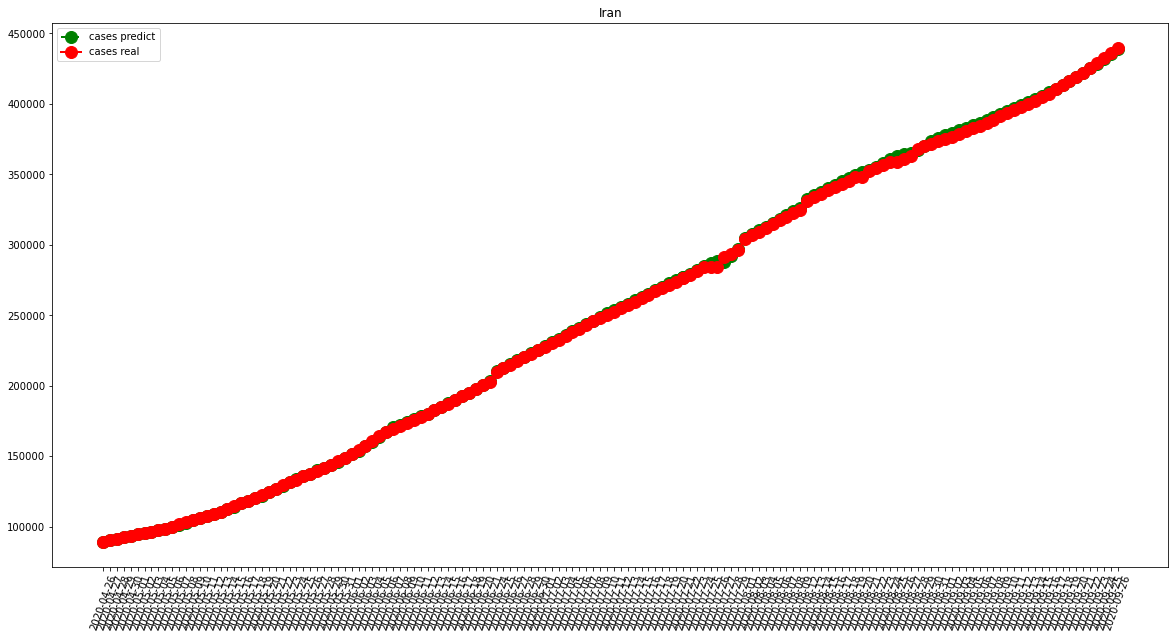

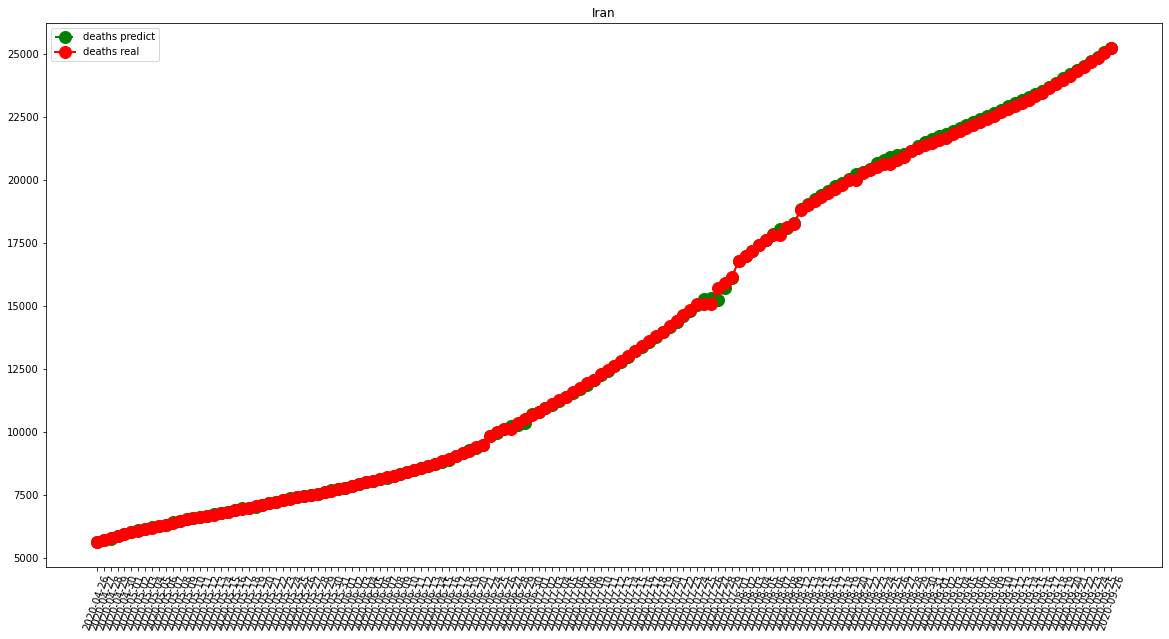

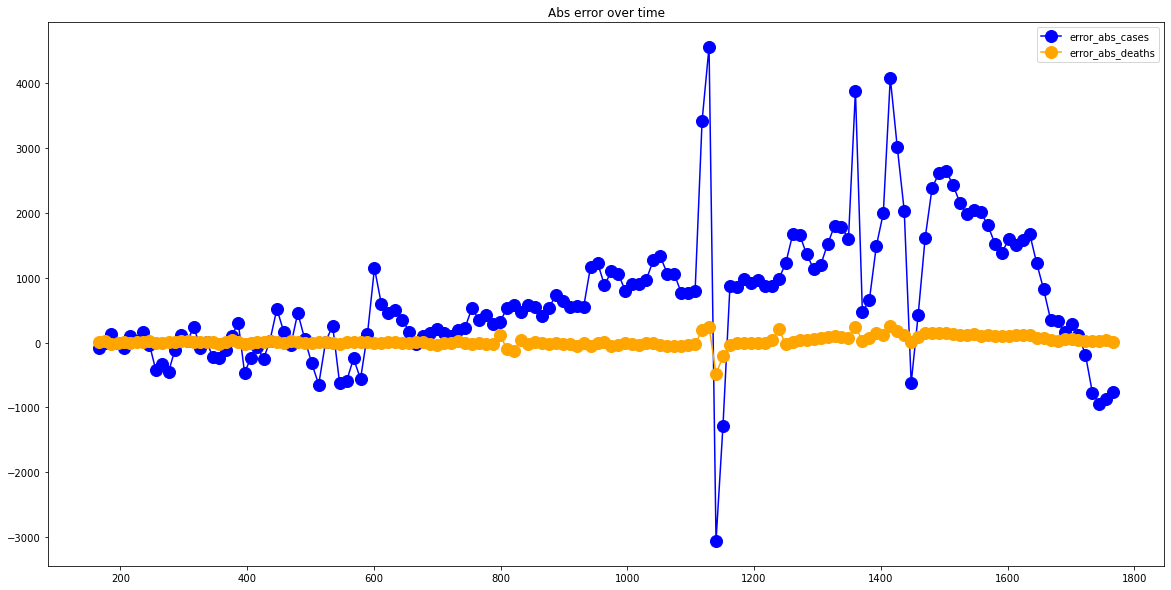

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  227.15436241610738
RMSE =  333.5385430974112
-- Turkey performances for deaths --
MAE =  15.912751677852349
RMSE =  83.42866582823433


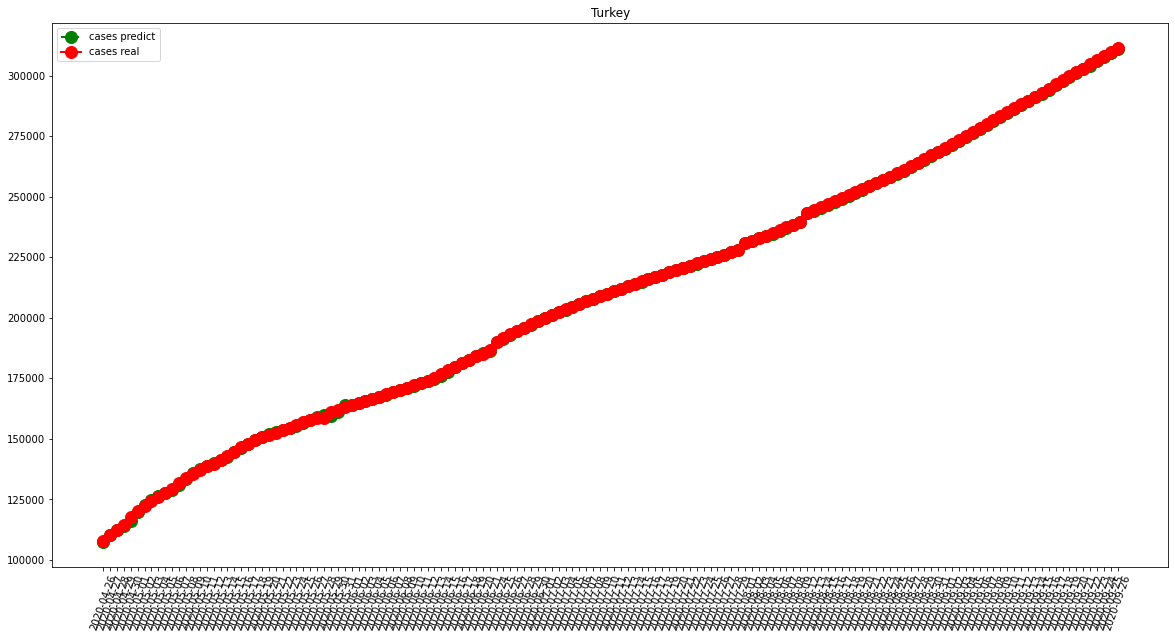

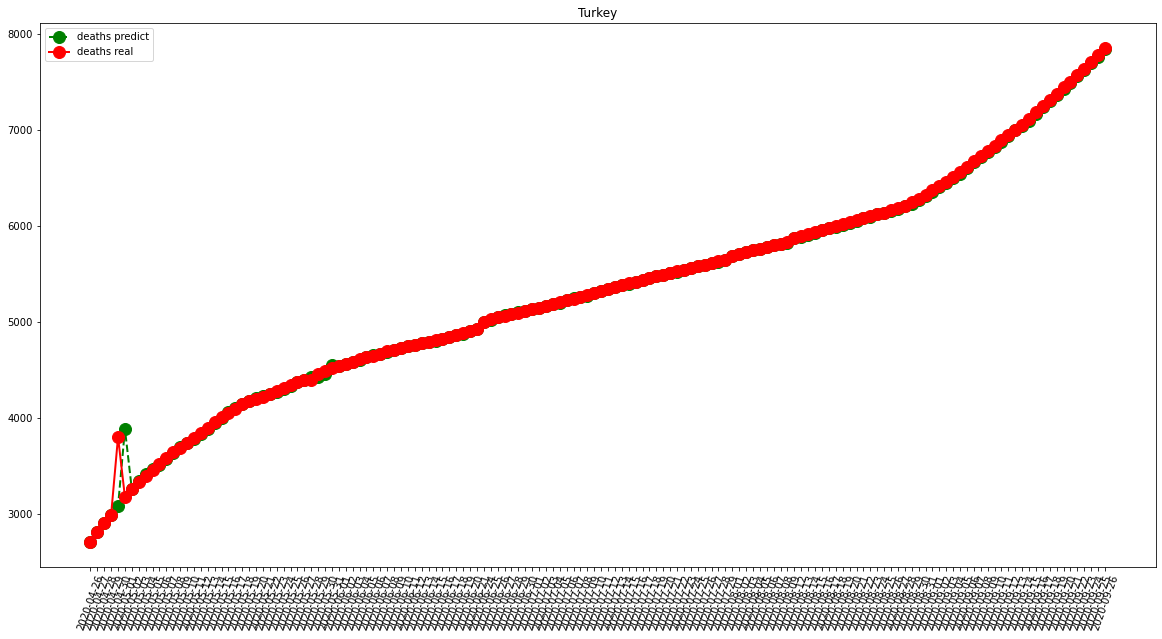

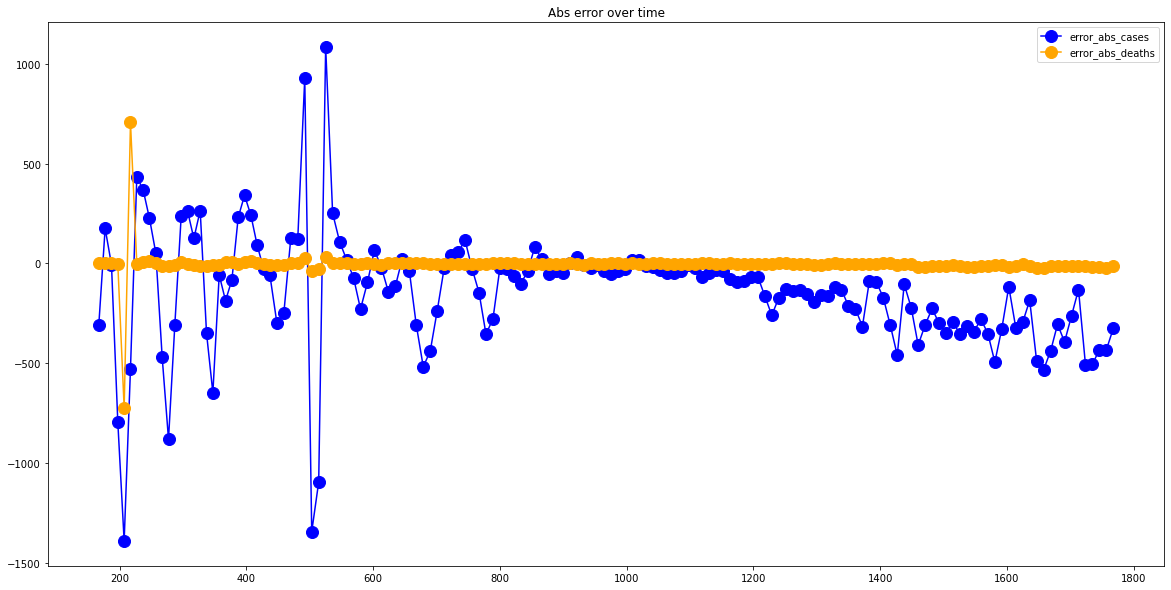

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  16792.122950819674
RMSE =  21885.290894406382
-- Brazil performances for deaths --
MAE =  497.0245901639344
RMSE =  600.5804774017097


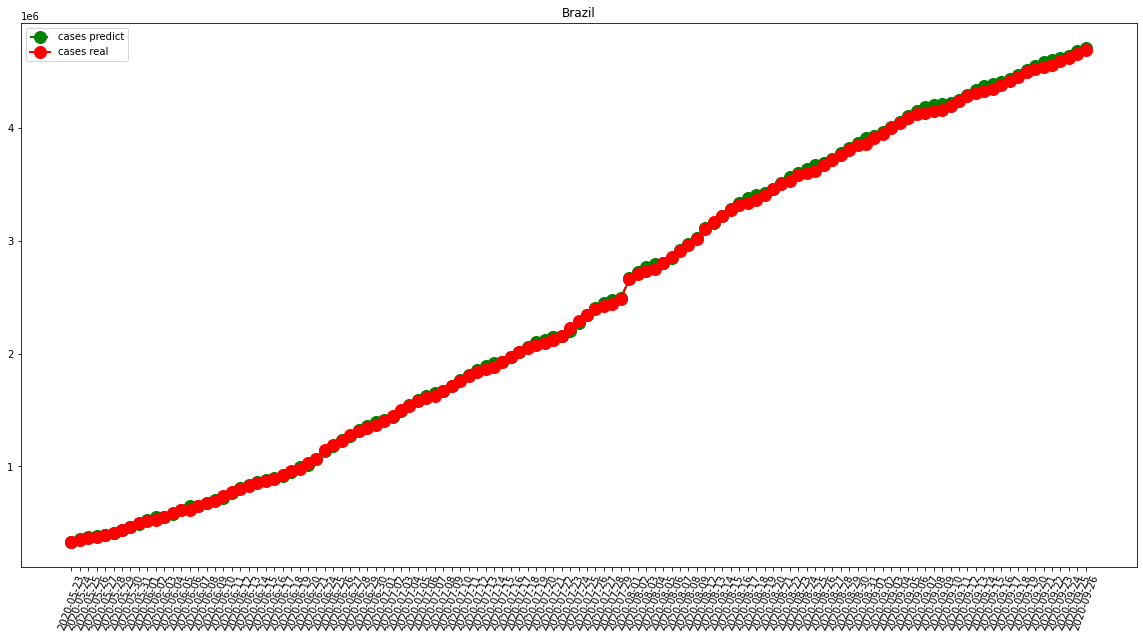

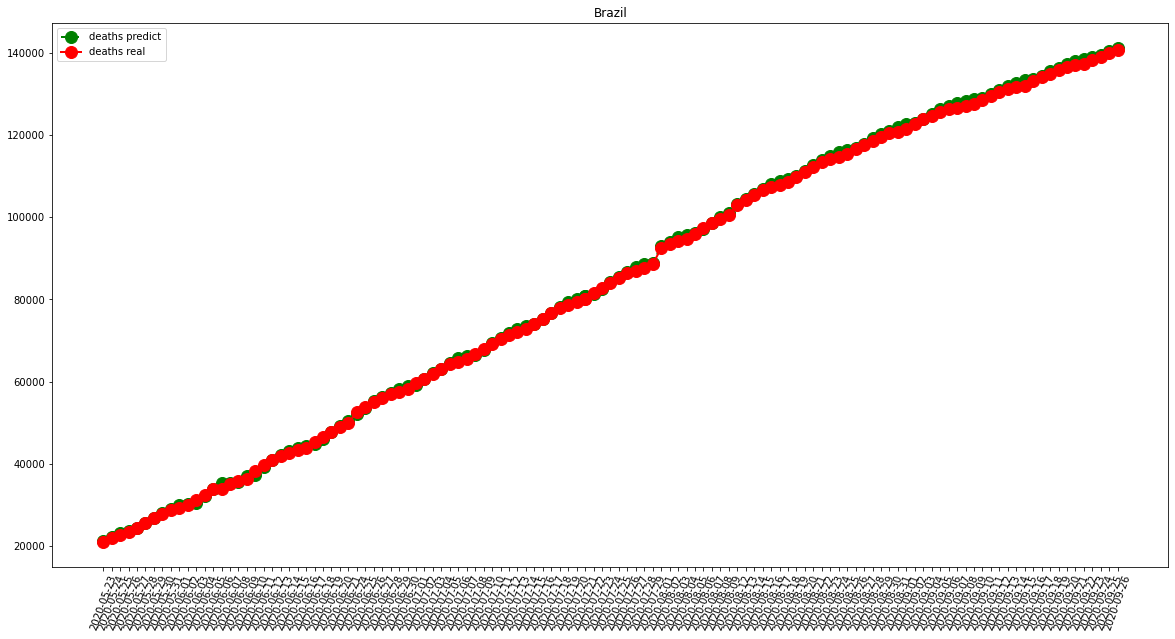

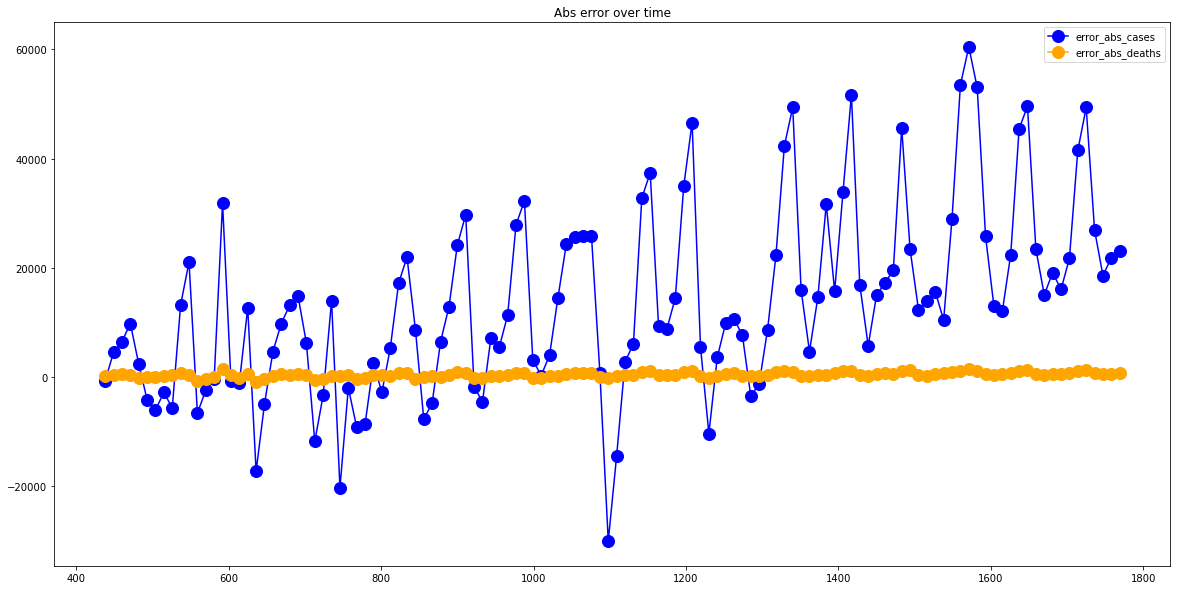

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)